# 군집분석

## K-Means 클러스터링


### 데이터 생성

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [3]:
X, y = make_classification(n_samples=20, n_features=2, n_informative=2,
                          n_redundant=0, n_clusters_per_class=1,
                          n_classes=2, random_state=123)

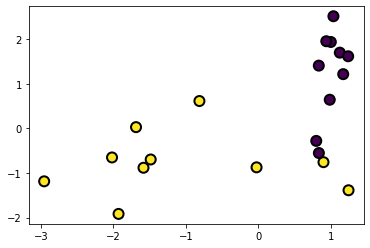

In [4]:
plt.scatter(X[:,0],X[:,1], marker='o', c=y,
           s=100, edgecolor='k', linewidth=2)
plt.show()

### KMeans모델 생성

In [5]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, init='random', random_state=1)
model.fit(X)

KMeans(init='random', n_clusters=2, random_state=1)

In [7]:
model.cluster_centers_

array([[ 1.01138251,  0.83200493],
       [-1.56258716, -0.69768199]])

In [8]:
pred = model.predict(X)
pred

array([0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0])

### 군집된 결과 표현하기

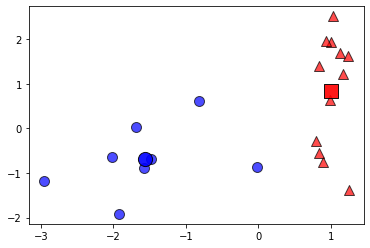

In [11]:
c0, c1 = model.cluster_centers_
plt.scatter(x=X[model.labels_==0,0], y=X[model.labels_==0,1],
           s=100, marker='^', c='r',edgecolor='k',alpha=0.7)
plt.scatter(x=X[model.labels_==1,0], y=X[model.labels_==1,1],
           s=100, marker='o',c='b',edgecolor='k',alpha=0.7)
plt.scatter(x=c0[0],y=c0[1], s=200,
           c='r', marker='s',edgecolor='k', alpha=0.9)
plt.scatter(x=c1[0],y=c1[1],
           s=200, c='b', marker='o', edgecolor='k', alpha=0.9)
plt.show()

### X데이터와 중심점 사이의 거리 데이터프레임

In [13]:
import pandas as pd
import numpy as np

In [14]:
# 유클리드 거리를 사용
df = pd.DataFrame(data=np.c_[X,
                            np.linalg.norm(X-c0,axis=1),
                            np.linalg.norm(X-c1, axis=1),
                            model.labels_],
                 columns=['X0','X1','d0','d1','class'])

In [15]:
df.head()

,X0,X1,d0,d1,class
0,1.038596,2.511754,1.679969,4.131178,0.0
1,1.002714,1.935215,1.103245,3.675992,0.0
2,-1.688105,0.025994,2.817248,0.734481,1.0
3,0.901344,-0.758966,1.594771,2.464693,0.0
4,0.836531,1.404882,0.598967,3.190070,0.0


### 회차별 군집 확인하기

In [17]:
def plot_cluster(model, data):
    c0, c1 = model.cluster_centers_
    plt.scatter(x=data[model.labels_==0, 0], y=data[model.labels_==0, 1],
    s=100, marker='^', c='r', edgecolor='k', alpha=0.7)
    plt.scatter(x=data[model.labels_==1, 0], y=data[model.labels_==1, 1],
    s=100, marker='o', c='b', edgecolor='k', alpha=0.7)
    plt.scatter(x=c0[0], y=c0[1], s=200,
    c='r', marker='s', edgecolor='k', alpha=0.9)
    plt.scatter(x=c1[0], y=c1[1],
    s=200, c='b', marker='o', edgecolor='k', alpha=0.9)

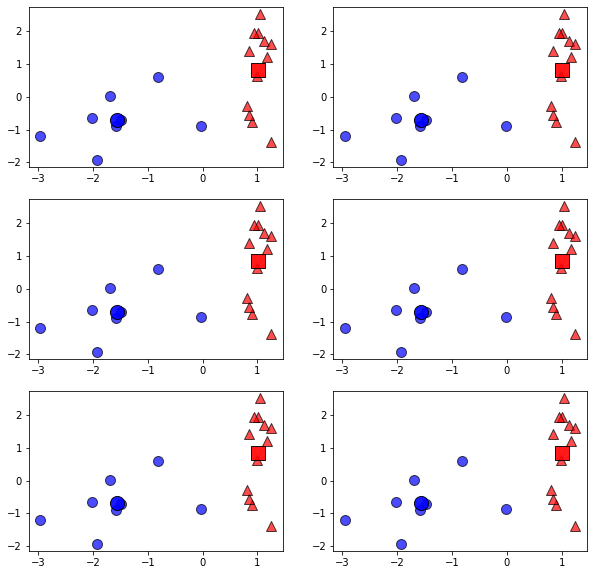

In [18]:
plt.figure(figsize=(10,10))
for i in range(6):
    model = KMeans(n_clusters=2, init='random',
                  n_init=3, max_iter=(i+1), random_state=1)
    model.fit(X)
    plt.subplot(3,2,(i+1))
    plot_cluster(model,X)
    

### iris 데이터 군집분석하기

In [19]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris_X = iris.iloc[:,:-1]
iris_y = iris.species
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [20]:
from sklearn.cluster import KMeans
iris_cluster_model = KMeans(n_clusters=3, random_state=1)
iris_cluster_model.fit(iris_X)

KMeans(n_clusters=3, random_state=1)

In [21]:
iris_cluster_model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [22]:
import numpy as np
pred = np.choose(iris_cluster_model.labels_,[1,0,2])
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(iris.species)
pred_str = le.inverse_transform(pred)

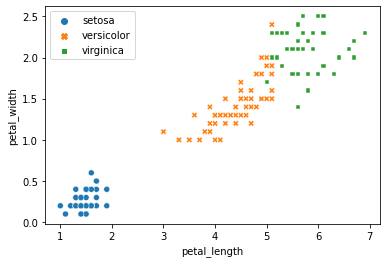

In [24]:
#군집 산점도
ax = sns.scatterplot(x='petal_length', y='petal_width', hue=pred_str,
                    style=pred_str, data=iris)

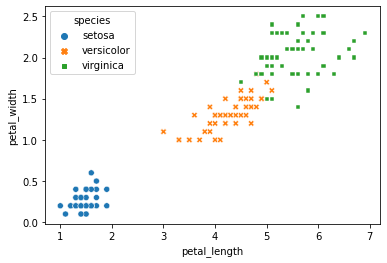

In [25]:
#원본 산점도
ax = sns.scatterplot(x="petal_length", y="petal_width",
hue="species", style="species", data=iris)

## K-Means 클러스터링의 한계와 극복

##### - 크기(dizes)
##### - 밀도(densities)
##### - 비 구형(non-globular shapes)

### 크기가 다른경우

In [27]:
import numpy as np
np.random.seed(0)
group0 = np.random.normal(-10,2,(10,2))
class0 = np.full(group0.shape[0],0)
group0 = np.c_[group0,class0]

In [28]:
group1 = np.random.normal(10,2,(10,2))
class1 = np.full(group1.shape[0],1)
group1 = np.c_[group1,class1]

In [30]:
group2 = np.random.normal(0,5,(100,2))
class2 = np.full(group2.shape[0],2)
group2 = np.c_[group2, class2]

In [31]:
data = np.r_[group0,group1,group2]

In [32]:
data

array([[ -6.47189531,  -9.19968558,   0.        ],
       [ -8.04252403,  -5.5182136 ,   0.        ],
       [ -6.26488402, -11.95455576,   0.        ],
       [ -8.09982316, -10.30271442,   0.        ],
       [-10.2064377 ,  -9.178803  ,   0.        ],
       [ -9.71191286,  -7.09145299,   0.        ],
       [ -8.47792455,  -9.75664997,   0.        ],
       [ -9.11227353,  -9.33265135,   0.        ],
       [ -7.01184185, -10.41031653,   0.        ],
       [ -9.3738646 , -11.70819148,   0.        ],
       [  4.89402037,  11.30723719,   1.        ],
       [ 11.7288724 ,   8.51566996,   1.        ],
       [ 14.53950925,   7.09126865,   1.        ],
       [ 10.09151703,   9.6256323 ,   1.        ],
       [ 13.06555843,  12.93871754,   1.        ],
       [ 10.30989485,  10.75632504,   1.        ],
       [  8.2244285 ,   6.03840706,   1.        ],
       [  9.3041757 ,  10.31269794,   1.        ],
       [ 12.46058136,  12.4047597 ,   1.        ],
       [  9.22534637,   9.39539

C:\Users\r2com\AppData\Local\Temp/ipykernel_8104/528668271.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  marker='o', c=data[:,2].astype(np.int), s=100,


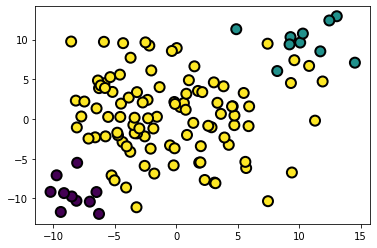

In [33]:
plt.scatter(x=data[:,0], y=data[:,1],
           marker='o', c=data[:,2].astype(np.int), s=100,
           edgecolor='k', linewidth=2)
plt.show()

In [35]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, init='random')
model.fit(data[:,0:2])

KMeans(init='random', n_clusters=3)

In [36]:
model.cluster_centers_

array([[ 7.93234415,  5.526175  ],
       [-2.11638402, -5.40013046],
       [-3.23795138,  3.79797742]])

In [37]:
pred = model.predict(data[:,0:2])
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2,
       1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1, 2, 2, 1, 0, 0,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 1, 2, 2, 2, 0, 2,
       2, 2, 1, 1, 2, 2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 0, 2, 1, 0, 0, 1, 2,
       1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 0,
       1, 2, 2, 2, 1, 1, 2, 2, 1, 2])

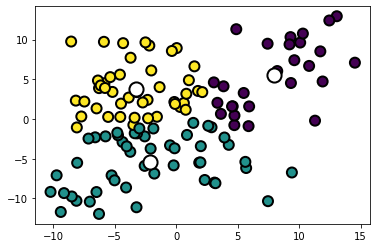

In [38]:
c = model.cluster_centers_
plt.scatter(x=data[:,0], y=data[:,1], c=pred,
           s=100, edgecolor='k', linewidth=2)
plt.scatter(x=c[:,0], y=c[:,1], s=200, c='w',edgecolor='k', linewidth=2)
plt.show()

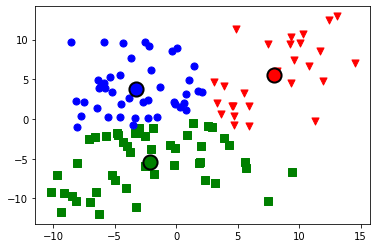

In [39]:
c0, c1, c2 = model.cluster_centers_
plt.scatter(x=data[model.labels_==0, 0], y=data[model.labels_==0, 1],
s=50, marker='v', c='r')
plt.scatter(x=data[model.labels_==1, 0], y=data[model.labels_==1, 1],
s=50, marker='s', c='g')
plt.scatter(x=data[model.labels_==2, 0], y=data[model.labels_==2, 1],
s=50, marker='o', c='b')
plt.scatter(x=c0[0], y=c0[1], s=200, c='r', edgecolor='k', linewidth=2)
plt.scatter(x=c1[0], y=c1[1], s=200, c='g', edgecolor='k', linewidth=2)
plt.scatter(x=c2[0], y=c2[1], s=200, c='b', edgecolor='k', linewidth=2)
plt.show()

In [40]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=6, init='random')
model.fit(data[:,0:2])

KMeans(init='random', n_clusters=6)

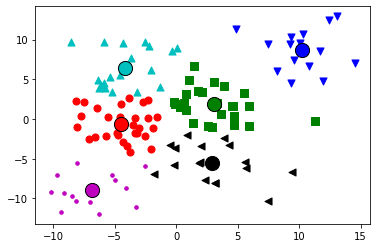

In [45]:
centers =model.cluster_centers_
colors = ['r', 'g', 'b', 'c', 'm', 'k']
markers = ['o', 's', 'v', '^', '.', '<']
for i, c in enumerate(centers):
    plt.scatter(x=data[model.labels_==i,0], y=data[model.labels_==i,1],
               s=50, marker=markers[i], c=colors[i])
    plt.scatter(x=c[0], y=c[1], s=200, c=colors[i], edgecolor='k')
plt.show()

### 밀도가 다른 경우

In [46]:
import numpy as np
np.random.seed(0)
group0 = np.random.normal(13, 0.5, (50,2))
class0 = np.full(group0.shape[0], 0)
group0 = np.c_[group0, class0]

In [47]:
group1 = np.random.normal(10, 1.5, (50,2))
class1 = np.full(group1.shape[0], 1)
group1 = np.c_[group1, class1]

In [48]:
group2 = np.random.normal(0, 5, (50,2))
class2 = np.full(group2.shape[0], 2)
group2 = np.c_[group2, class2]

In [49]:
data = np.r_[group0, group1, group2]

C:\Users\r2com\AppData\Local\Temp/ipykernel_8104/160508726.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  marker='o', c=data[:, 2].astype(np.int), s=100,


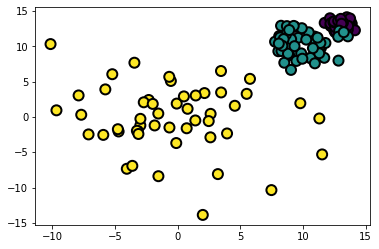

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x=data[:, 0], y=data[:, 1],
marker='o', c=data[:, 2].astype(np.int), s=100,
edgecolor="k", linewidth=2)
plt.show()

In [52]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, init='random')
model.fit(data[:,0:2])

KMeans(init='random', n_clusters=3)

In [53]:
pred = model.predict(data[:,0:2])

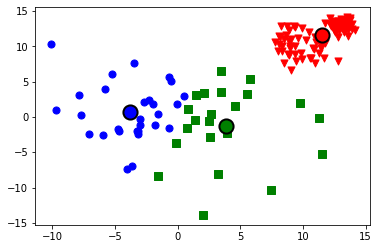

In [54]:
c0, c1, c2 = model.cluster_centers_
plt.scatter(x=data[model.labels_==0, 0], y=data[model.labels_==0, 1],
s=50, marker='v', c='r')
plt.scatter(x=data[model.labels_==1, 0], y=data[model.labels_==1, 1],
s=50, marker='s', c='g')
plt.scatter(x=data[model.labels_==2, 0], y=data[model.labels_==2, 1],
s=50, marker='o', c='b')
plt.scatter(x=c0[0], y=c0[1], s=200, c='r', edgecolor='k', linewidth=2)
plt.scatter(x=c1[0], y=c1[1], s=200, c='g', edgecolor='k', linewidth=2)
plt.scatter(x=c2[0], y=c2[1], s=200, c='b', edgecolor='k', linewidth=2)
plt.show()

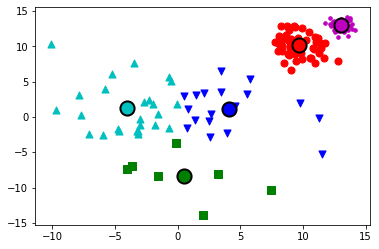

In [56]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5, init="random")
model.fit(data[:, 0:2])
centers = model.cluster_centers_
colors = ['r', 'g', 'b', 'c', 'm']
markers = ['o', 's', 'v', '^', '.']
for i, c in enumerate(centers):
    plt.scatter(x=data[model.labels_==i, 0], y=data[model.labels_==i, 1],
    s=50, marker=markers[i], c=colors[i])
    plt.scatter(x=c[0], y=c[1], s=200,
    c=colors[i], edgecolor='k', linewidth=2)
plt.show()

In [57]:
data

array([[ 13.88202617,  13.2000786 ,   0.        ],
       [ 13.48936899,  14.1204466 ,   0.        ],
       [ 13.933779  ,  12.51136106,   0.        ],
       [ 13.47504421,  12.9243214 ,   0.        ],
       [ 12.94839057,  13.20529925,   0.        ],
       [ 13.07202179,  13.72713675,   0.        ],
       [ 13.38051886,  13.06083751,   0.        ],
       [ 13.22193162,  13.16683716,   0.        ],
       [ 13.74703954,  12.89742087,   0.        ],
       [ 13.15653385,  12.57295213,   0.        ],
       [ 11.72350509,  13.3268093 ,   0.        ],
       [ 13.4322181 ,  12.62891749,   0.        ],
       [ 14.13487731,  12.27281716,   0.        ],
       [ 13.02287926,  12.90640807,   0.        ],
       [ 13.76638961,  13.73467938,   0.        ],
       [ 13.07747371,  13.18908126,   0.        ],
       [ 12.55610713,  12.00960177,   0.        ],
       [ 12.82604393,  13.07817448,   0.        ],
       [ 13.61514534,  13.60118992,   0.        ],
       [ 12.80633659,  12.84884

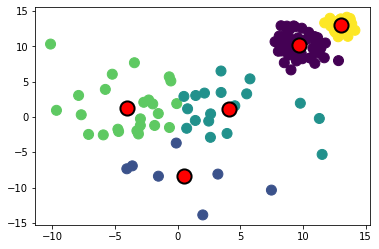

In [65]:
pred = model.predict(data[:,0:2])
c = model.cluster_centers_
plt.scatter(x=data[:,0], y=data[:,1],c=pred, s=100)
plt.scatter(x=c[:,0], y=c[:,1], s=200, c='r', edgecolor='k', linewidth=2)
plt.show()

### 비 구형인 경우

In [66]:
import numpy as np
np.random.seed(0)
X1 = np.random.rand(200)*3
noise = np.random.normal(0,0.2,X1.shape)
Y1 = np.sin(X1) + noise

X2 = X1+1.5
Y2 = np.cos(X2)+noise
group1 = np.c_[X1, Y1, np.full(X1.shape[0], 0)]
group2 = np.c_[X2, Y2, np.full(X2.shape[0], 1)]
data = np.r_[group1, group2]

C:\Users\r2com\AppData\Local\Temp/ipykernel_8104/102123647.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c=data[:, 2].astype(np.int),


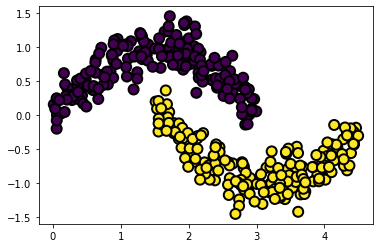

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(x=data[:, 0], y=data[:, 1], marker='o',
c=data[:, 2].astype(np.int),s=100, edgecolor="k", linewidth=2)
plt.show()

In [68]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, init="random")
model.fit(data[:, 0:2])

KMeans(init='random', n_clusters=2)

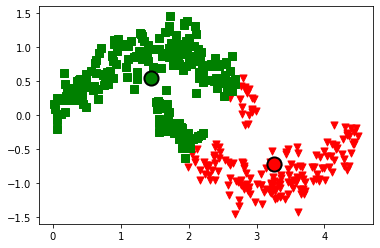

In [69]:
c0, c1 = model.cluster_centers_
plt.scatter(x=data[model.labels_==0, 0], y=data[model.labels_==0, 1],
s=50, marker='v', c='r')
plt.scatter(x=data[model.labels_==1, 0], y=data[model.labels_==1, 1],
s=50, marker='s', c='g')
plt.scatter(x=c0[0], y=c0[1], s=200, c='r', edgecolor='k', linewidth=2)
plt.scatter(x=c1[0], y=c1[1], s=200, c='g', edgecolor='k', linewidth=2)
plt.show()

In [78]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=7, init="random", random_state=2)
model.fit(data[:, 0:2])

KMeans(init='random', n_clusters=7, random_state=2)

In [79]:
center = model.cluster_centers_
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
markers = ['o', 's', 'v', '^', '.', '*', '<']

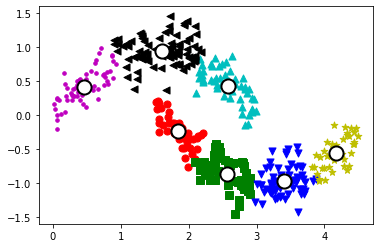

In [74]:
for i, c in enumerate(center):
    plt.scatter(x=data[model.labels_==i, 0], y=data[model.labels_==i, 1],
    s=50, marker=markers[i], c=colors[i])
    plt.scatter(x=c[0], y=c[1], s=200, c='w', edgecolor='k', linewidth=2)
plt.show()

In [77]:
from sklearn.metrics import silhouette_score
range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    model=KMeans(n_clusters=n_clusters, random_state=2)
    cluster_labels = model.fit_predict(data[:,:-1])
    score = silhouette_score(data[:,:-1], cluster_labels)
    print("클러스터 수: {}, 실루엣 계수: {}".format(n_clusters, score))

클러스터 수: 2, 실루엣 계수: 0.533235774308134
클러스터 수: 3, 실루엣 계수: 0.4701230677079941
클러스터 수: 4, 실루엣 계수: 0.4732502498237369
클러스터 수: 5, 실루엣 계수: 0.45962085906799105
클러스터 수: 6, 실루엣 계수: 0.49827095148830175
클러스터 수: 7, 실루엣 계수: 0.5027363876263838
클러스터 수: 8, 실루엣 계수: 0.4918697936848558
클러스터 수: 9, 실루엣 계수: 0.47303667875323785
클러스터 수: 10, 실루엣 계수: 0.4504109748038108


In [102]:
data=np.c_[data,model.predict(data[:,0:2])]

In [106]:
c=pd.DataFrame(data,columns=['data1','data2','label','cluster'])

In [107]:
c.head()

,data1,data2,label,cluster
0,1.646441,1.222468,0.0,6.0
1,2.145568,0.623330,0.0,3.0
2,1.808290,0.742437,0.0,6.0
3,1.634650,0.910398,0.0,6.0
4,1.270964,0.855780,0.0,6.0


In [118]:
c.groupby('cluster').mean().sort_values('data2')

,data1,data2,label
cluster,,,
2.0,3.397110,-0.972430,1.000000
1.0,2.561724,-0.860738,1.000000
5.0,4.176898,-0.553115,1.000000
0.0,1.839878,-0.233290,1.000000
4.0,0.454987,0.417104,0.000000
3.0,2.576116,0.426346,0.000000
6.0,1.604378,0.939544,0.011236


## Hierarchical 클러스터링

In [119]:
import seaborn as sns
iris = sns.load_dataset('iris')

In [120]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(iris.species)
iris.species = le.transform(iris.species)

In [121]:
from scipy.cluster.hierarchy import linkage
cluster_model = linkage(iris, method='complete')

In [122]:
import matplotlib.pyplot as plt
%matplotlib inline

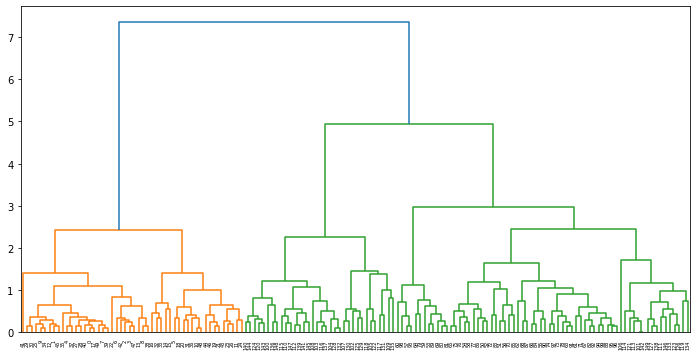

In [123]:
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(12,6))
dendrogram(cluster_model, labels=iris.index)
plt.show()

In [124]:
# y=4인 선을 그으면 3개의 군집인 모형이 생성된다
from scipy.cluster.hierarchy import fcluster
fcluster(cluster_model, 4, criterion='distance')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

In [125]:
fcluster(cluster_model, 2, criterion='distance')

array([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 2, 1, 2, 1, 6, 6, 6, 5, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 5, 6,
       6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 6,
       6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 3, 7, 4, 3, 3, 4, 7, 4, 3, 4,
       3, 7, 3, 7, 7, 3, 3, 4, 4, 7, 3, 7, 4, 7, 3, 4, 7, 7, 3, 4, 4, 4,
       3, 7, 7, 4, 3, 3, 7, 3, 3, 3, 7, 3, 3, 3, 7, 3, 3, 7], dtype=int32)

In [126]:
from scipy.cluster.hierarchy import fcluster
predict = fcluster(cluster_model, 4, criterion='distance')

In [127]:
import numpy as np
adjusted_pred = np.choose((predict-1), [0,2,1])
adjusted_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [128]:
import pandas as pd
pred_name = le.inverse_transform(adjusted_pred)
origin_name = le.inverse_transform(iris.species.values)
pd.crosstab(origin_name, pred_name,
           rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,setosa,versicolor,virginica,All
True,,,,
setosa,50,0,0,50
versicolor,0,50,0,50
virginica,0,16,34,50
All,50,66,34,150


<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

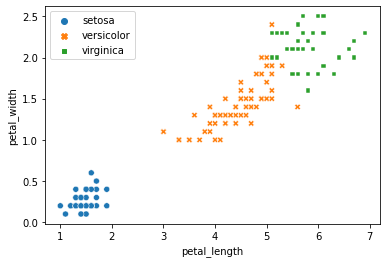

In [129]:
sns.scatterplot(x='petal_length', y='petal_width', data=iris,
               hue=pred_name, style=pred_name)

## DBSCAN 클러스터링

C:\Users\r2com\AppData\Local\Temp/ipykernel_8104/3813549360.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  marker='o', c=data[:,2].astype(np.int),


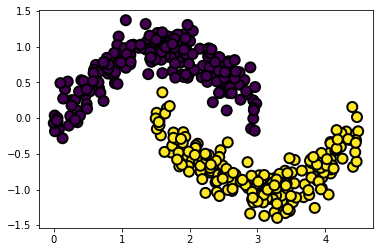

In [145]:
import numpy as np
X1 = np.random.rand(200)*3
noise = np.random.normal(0, 0.2, X1.shape)
Y1 = np.sin(X1)+noise
X2 = X1 +1.5
Y2 = np.cos(X2) + noise
group1 = np.c_[X1, Y1, np.full(X1.shape[0], 0)]
group2 = np.c_[X2, Y2, np.full(X2.shape[0], 1)]
data = np.r_[group1, group2]
import matplotlib.pyplot as plt
plt.scatter(x=data[:,0], y=data[:,1],
    marker='o', c=data[:,2].astype(np.int),
s=100, edgecolor='k', linewidth=2)
plt.show()

In [146]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.3, min_samples=10)
db.fit(data[:,0:2])
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [147]:
db.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

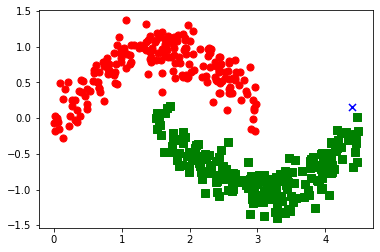

In [148]:
import matplotlib.pyplot as plt
colors = ['r', 'g']
markers = ['o', 's']
for i in range(n_clusters_):
    plt.scatter(x=data[db.labels_==i,0], y=data[db.labels_==i,1],
        s=50, marker=markers[i], c=colors[i])
plt.scatter(x=data[db.labels_==-1,0], y=data[db.labels_==-1,1],
    s=50, marker='x', c='b')
plt.show()

In [140]:
db.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,